<a href="https://colab.research.google.com/github/shrikant131/Mini-Project/blob/main/notebooks/luggage_bags_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Luggage Bags Cost Prediction

## Import necessary libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


## Load the dataset

In [45]:
data = pd.read_excel('Miniproject_Dataset.xlsx', engine='openpyxl')
data.head()


,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


## Perform EDA

**Tasks Performed:**

Tasks:
Check data types and null values using data.info() and data.isnull().sum().
Calculate summary statistics using data.describe().
Handle missing values (replace '#','$','U' with NaN and drop rows with NaN).
Detect and handle outliers using IQR (Interquartile Range).

In [46]:
# Check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [47]:
# Summary statistics
data.describe(include='all')

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.0,159.000000,159.0,158.000000,158.000
unique,NaN,118.0,NaN,124.0,NaN,152.000
top,NaN,19.0,NaN,23.5,NaN,3.525
freq,NaN,6.0,NaN,5.0,NaN,3.000
mean,398.326415,NaN,28.415723,NaN,8.933124,NaN
std,357.978317,NaN,10.716328,NaN,4.273069,NaN
min,0.000000,NaN,8.400000,NaN,1.728400,NaN
25%,120.000000,NaN,21.000000,NaN,5.940600,NaN
50%,273.000000,NaN,27.300000,NaN,7.733000,NaN
75%,650.000000,NaN,35.500000,NaN,12.248700,NaN


In [48]:
# Check for null values
data.isnull().sum()

,0
Cost,0
Weight,0
Weight1,0
Length,0
Height,1
Width,1


In [49]:
# Replace '#' with NaN in all columns
data = data.replace(['#', '$', 'U'], np.nan)

# Convert all columns to numeric, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with null or NaN values
data = data.dropna()

# Check for outliers using IQR
# Select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=np.number)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on outliers in numeric columns
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-49-eb0e5ffde102>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(['#', '$', 'U'], np.nan)


## Plot various graphs

**Tasks Performed:**
Visualize data distributions, relationships, and patterns.

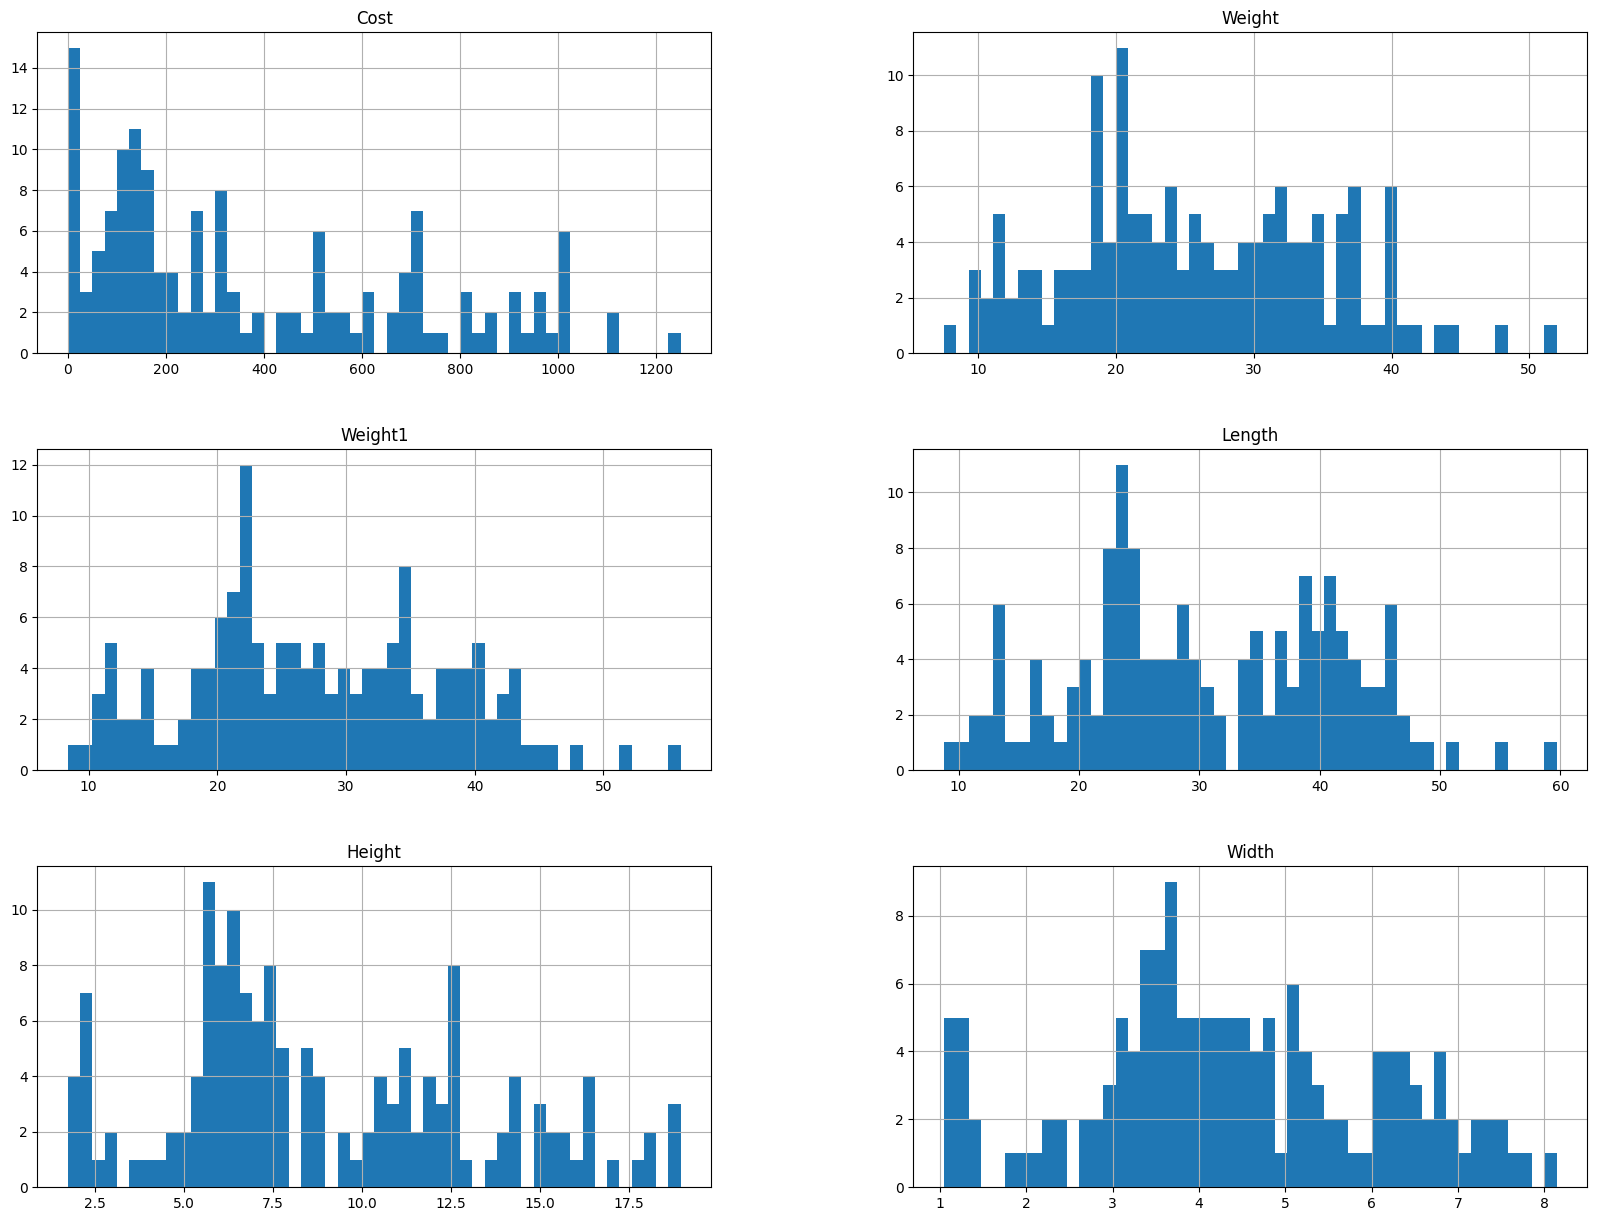

In [50]:
# Plot histograms
data.hist(bins=50, figsize=(20,15))
plt.show()

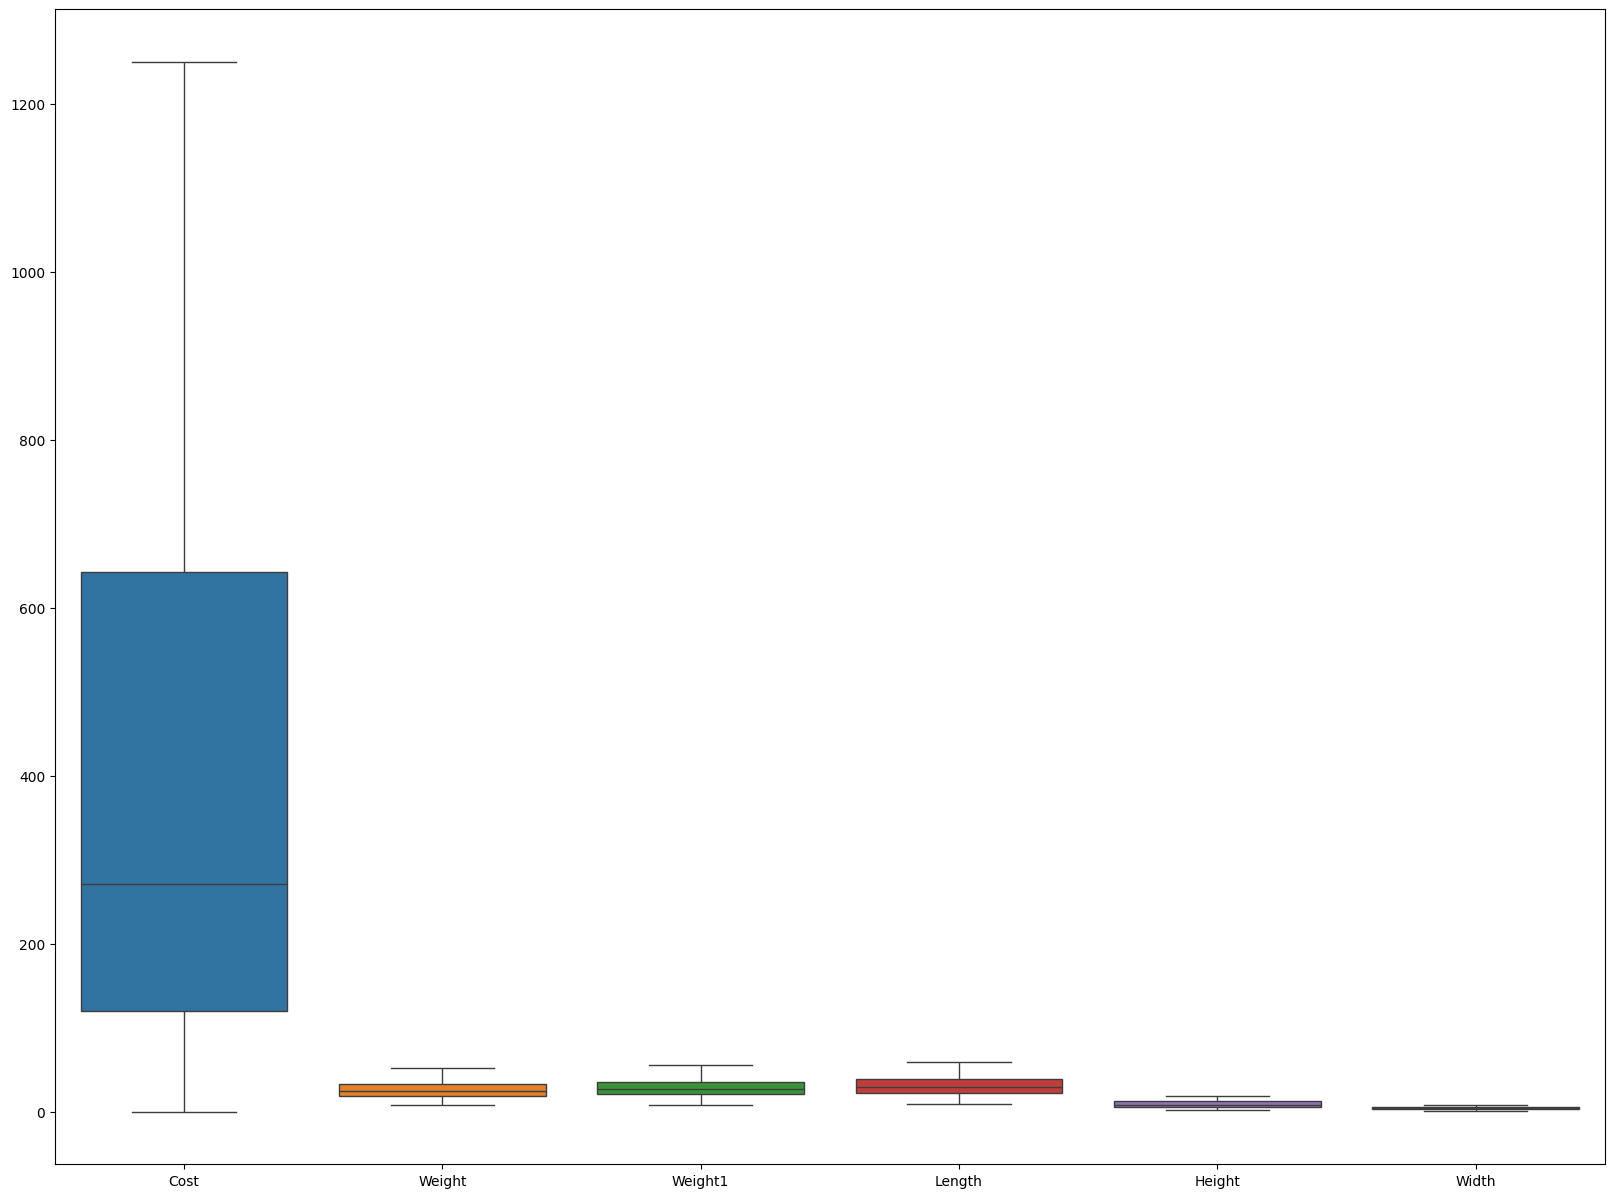

In [51]:
# Plot box plots
plt.figure(figsize=(20,15))
sns.boxplot(data=data)
plt.show()

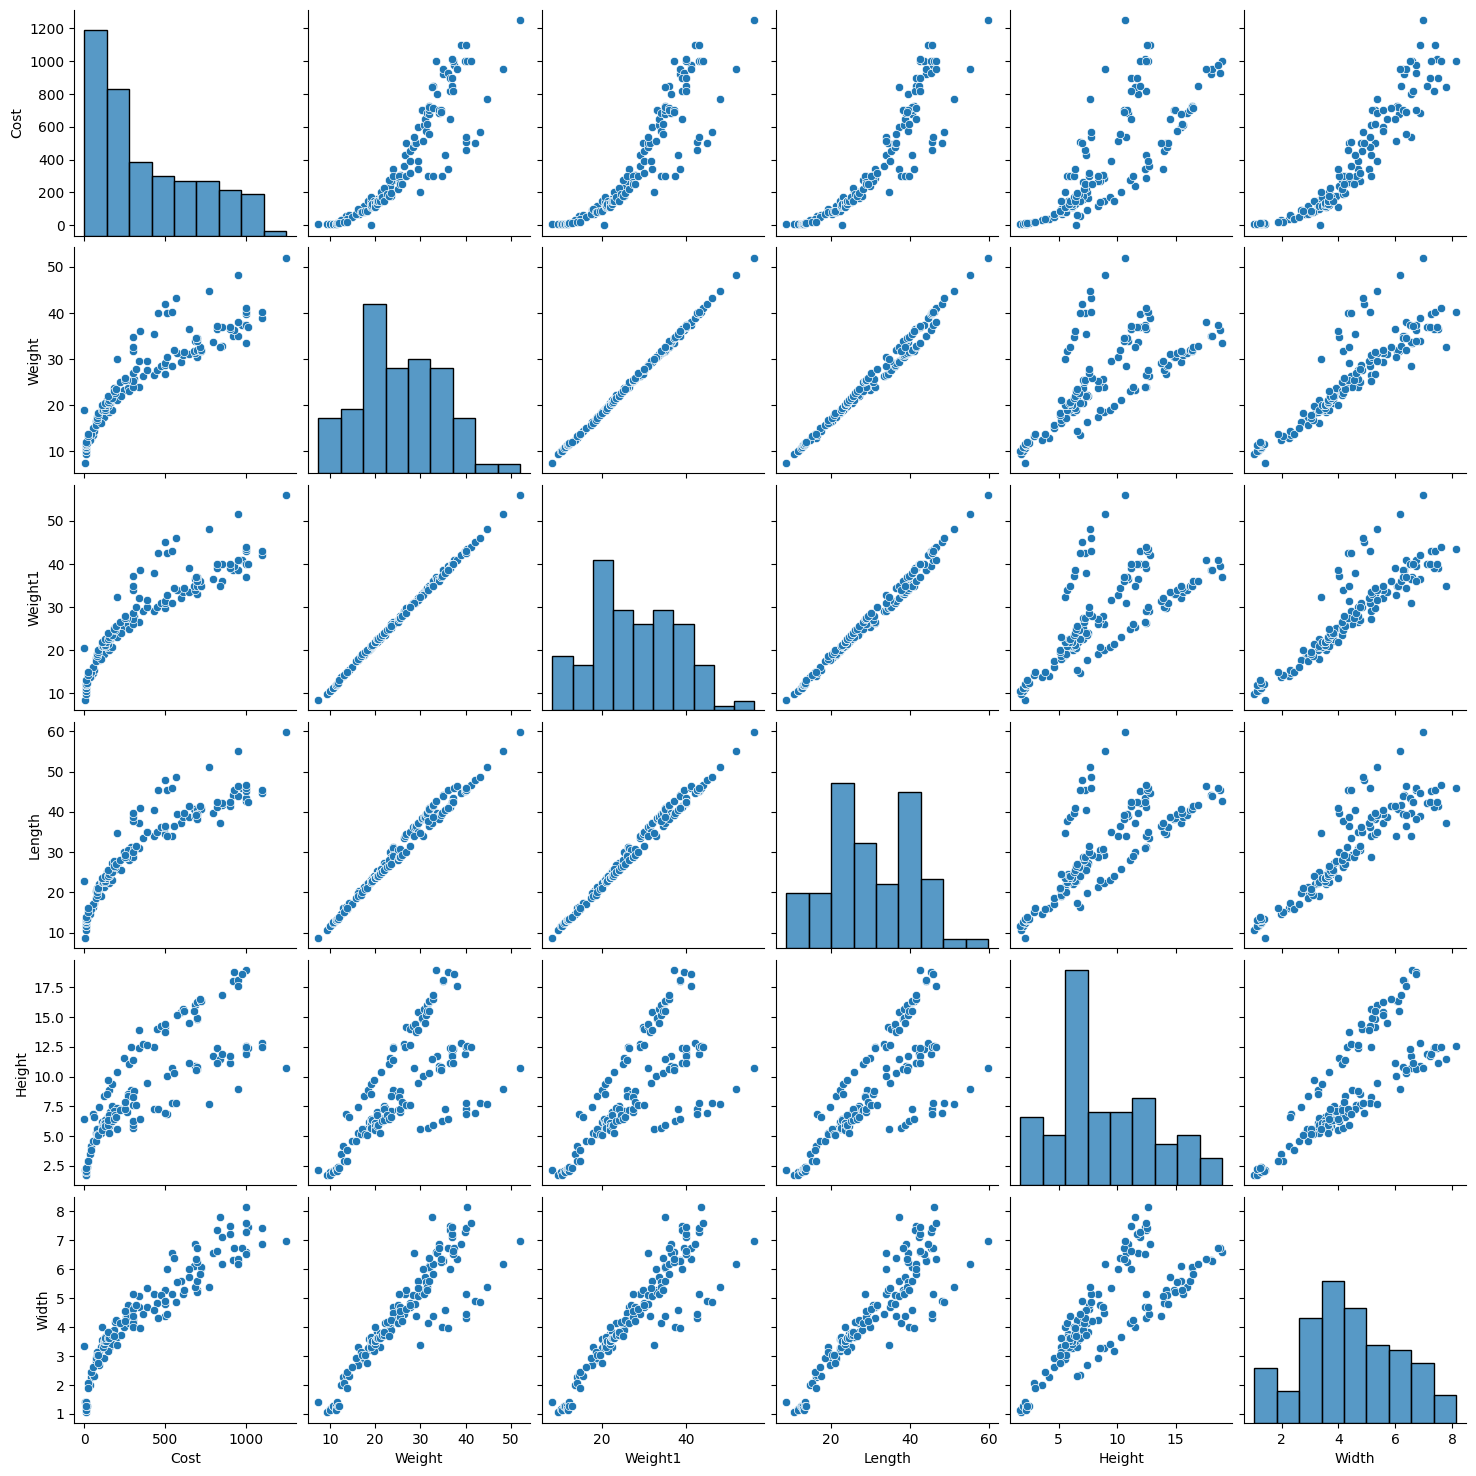

In [52]:
# Plot pair plots
sns.pairplot(data)
plt.show()

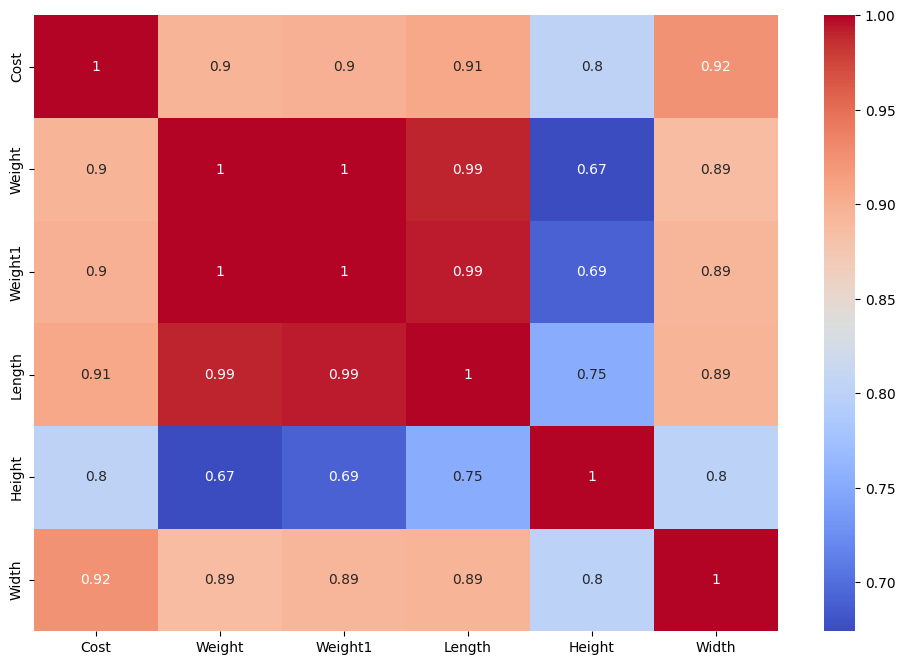

In [53]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Prepare data for model building

In [54]:
X = data.drop('Cost', axis=1)
y = data['Cost']

# Assuming X and y are already defined

# Add bias term to X
X_with_bias = np.c_[X, np.ones(X.shape[0])]  # Add a column of ones for the bias term

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build and evaluate models

In [55]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mse_lin = mean_squared_error(y_test, y_pred_lin)

#---------------------------------------------------------------------#
def batch_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=1000):

    # Add bias feature to training and testing data
    X_train = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test = np.c_[X_test, np.ones(X_test.shape[0])]

    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)  # Initialize weights
    cost_history = []

    for _ in range(n_iterations):
        y_predicted = X_train.dot(weights)
        errors = y_predicted - y_train
        gradient = X_train.T.dot(errors) / n_samples
        weights -= learning_rate * gradient
        cost = np.sum(errors**2) / (2 * n_samples)  # Calculate cost
        cost_history.append(cost)

    y_pred_bgd = X_test.dot(weights)  # Predictions on test data
    r2_bgd = r2_score(y_test, y_pred_bgd)
    rmse_bgd = np.sqrt(mean_squared_error(y_test, y_pred_bgd))
    mse_bgd = mean_squared_error(y_test, y_pred_bgd)

    print("SGD: R2 =", r2_bgd, ", RMSE =", rmse_bgd, ", MSE =", mse_bgd)

    return cost_history , r2_bgd, rmse_bgd, mse_bgd


def stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=1000):
  # Add bias feature to training and testing data
  X_train = np.c_[X_train, np.ones(X_train.shape[0])]
  X_test = np.c_[X_test, np.ones(X_test.shape[0])]

  n_samples, n_features = X_train.shape
  weights = np.zeros(n_features)
  cost_history = []

  for _ in range(n_iterations):
      for i in range(y_train.shape[0]):  # Get total items from y_train
          y_predicted = X_train[i].dot(weights)
          # Access y_train using .iloc to ensure you're using the positional index
          error = y_predicted - y_train.iloc[i]
          gradient = X_train[i].reshape(1, -1).T.dot(error)
          weights -= learning_rate * gradient.reshape(-1)
          # Calculate cost using 'error' instead of 'errors'
          # Note: This cost is calculated per sample in the Stochastic GD
          cost = error**2 / (2)
          cost_history.append(cost)

  y_pred_sgd = X_test.dot(weights)
  r2_sgd = r2_score(y_test, y_pred_sgd)
  rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
  mse_sgd = mean_squared_error(y_test, y_pred_sgd)

  print("Gradient Descent: R2 =", r2_sgd, ", RMSE =", rmse_sgd, ", MSE =", mse_sgd)

  return cost_history, r2_sgd, rmse_sgd, mse_sgd


def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=1000, batch_size=32):

    # Add bias feature to training and testing data
    X_train = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test = np.c_[X_test, np.ones(X_test.shape[0])]

    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)  # Initialize weights
    cost_history = []

    for _ in range(n_iterations):
        for i in range(0, n_samples, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            y_predicted = X_batch.dot(weights)  # Prediction with bias
            errors = y_predicted - y_batch
            gradient = X_batch.T.dot(errors) / len(y_batch)
            weights -= learning_rate * gradient  # Update weights


        # Calculate cost after each epoch
        y_predicted = X_train.dot(weights)
        errors = y_predicted - y_train
        cost = np.sum(errors**2) / (2 * n_samples)
        cost_history.append(cost)

    y_pred_mbgd = X_test.dot(weights)  # Predictions on test data
    r2_mbgd = r2_score(y_test, y_pred_mbgd)
    rmse_mbgd = np.sqrt(mean_squared_error(y_test, y_pred_mbgd))
    mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)


    print("Mini Batch Gradient Descent: R2 =", r2_mbgd, ", RMSE =", rmse_mbgd, ", MSE =", mse_mbgd)

    return cost_history , r2_mbgd, rmse_mbgd, mse_mbgd


# Get cost histories
iterations = 1000
cost_history_batch, r2_bgd, rmse_bgd, mse_bgd = batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate=0.01, n_iterations=iterations)
cost_history_stochastic , r2_sgd, rmse_sgd, mse_sgd = stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate=0.01, n_iterations=iterations)
cost_history_mini_batch ,r2_mbgd, rmse_mbgd, mse_mbgd = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate=0.01, n_iterations=iterations, batch_size=32)


#using sklearn
def sgd_regressor_with_metrics(X_train, y_train, X_test, y_test, learning_rate='invscaling', n_iterations=1000):
    # Set eta0 to 0.01 when learning_rate is 'invscaling' or 'constant'
    eta0_value = 0.01 if learning_rate in ('invscaling', 'constant') else None
    sgd_reg = SGDRegressor(max_iter=1, learning_rate=learning_rate, warm_start=True,
                           tol=None, eta0=eta0_value)

    cost_history = []
    for _ in range(n_iterations):
        sgd_reg.partial_fit(X_train, y_train)
        y_pred_train = sgd_reg.predict(X_train)  # Predictions on training data for cost
        cost = mean_squared_error(y_train, y_pred_train) / 2
        cost_history.append(cost)

    y_pred_test = sgd_reg.predict(X_test)  # Predictions on test data for metrics
    r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mse = mean_squared_error(y_test, y_pred_test)

    return cost_history, r2, rmse, mse

# Get results for each method
cost_history_sgd, r2_sgd_sk, rmse_sgd_sk, mse_sgd_sk = sgd_regressor_with_metrics(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate='invscaling', n_iterations=iterations)
cost_history_bgd, r2_bgd_sk, rmse_bgd_sk, mse_bgd_sk = sgd_regressor_with_metrics(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate='constant', n_iterations=iterations)
cost_history_mbgd, r2_mbgd_sk, rmse_mbgd_sk, mse_mbgd_sk = sgd_regressor_with_metrics(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate='constant', n_iterations=iterations)

# Now you can print the values:
print(f"Linear Regression SK Learn: R2 = {r2_lin}, RMSE = {rmse_lin}, MSE = {mse_lin}")
print(f"SGD Regressor SK Learn: R2 = {r2_sgd_sk}, RMSE = {rmse_sgd_sk}, MSE = {mse_sgd_sk}")
print(f"Gradient Descent Regressor SK Learn: R2 = {r2_bgd_sk}, RMSE = {rmse_bgd_sk}, MSE = {mse_bgd_sk}")
print(f"Mini Batch Gradient Descent SK Learn: R2 = {r2_mbgd_sk}, RMSE = {rmse_mbgd_sk}, MSE = {mse_mbgd_sk}")


SGD: R2 = 0.8869954448972219 , RMSE = 120.44560359916395 , MSE = 14507.143426366934
Gradient Descent: R2 = 0.9033345616882575 , RMSE = 111.39830677587867 , MSE = 12409.582752532773
Mini Batch Gradient Descent: R2 = 0.8892862066756554 , RMSE = 119.2185520794095 , MSE = 14213.063159910876
Linear Regression SK Learn: R2 = 0.9051624131749928, RMSE = 110.3400622944197, MSE = 12174.929347136418
SGD Regressor SK Learn: R2 = 0.8894276148797178, RMSE = 119.14239233742617, MSE = 14194.909651885187
Gradient Descent Regressor SK Learn: R2 = 0.9008022800801183, RMSE = 112.84798854949432, MSE = 12734.6685196668
Mini Batch Gradient Descent SK Learn: R2 = 0.8956609924304009, RMSE = 115.73542965650995, MSE = 13394.689677776963


## Compare results

,Model,R-squared,RMSE,MSE
0,Linear Regression,0.905162,110.340062,12174.929347
1,Batch GD (Custom),0.886995,120.445604,14507.143426
2,Stochastic GD (Custom),0.903335,111.398307,12409.582753
3,Mini-batch GD (Custom),0.889286,119.218552,14213.063160
4,Batch Gradient - sklearn,0.889428,119.142392,14194.909652
5,Stochastic GD - sklearn,0.900802,112.847989,12734.668520
6,Mini-batch Gd - sklearn,0.895661,115.735430,13394.689678



The best model is: Linear Regression with R-squared = 0.9052


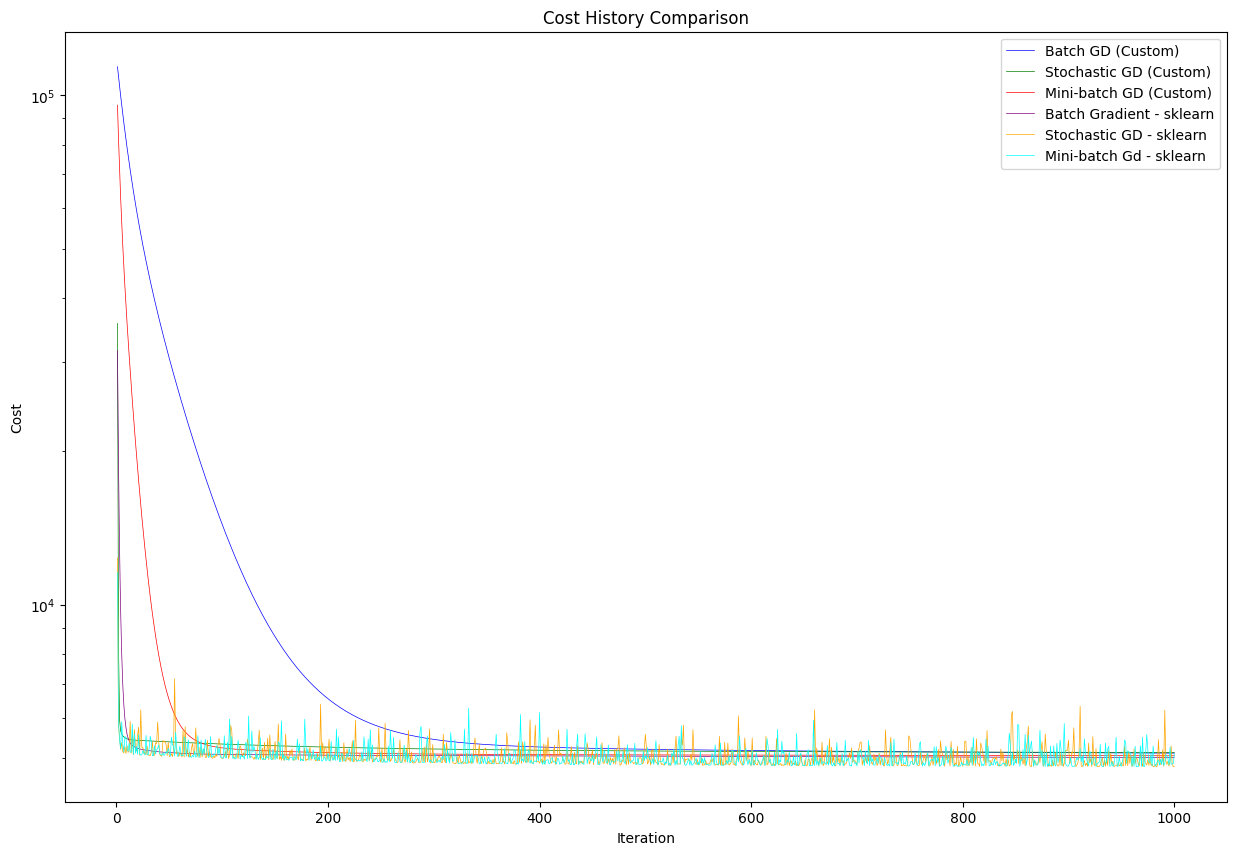

In [56]:
# Compare Results
results = {
    'Model': ['Linear Regression',
              'Batch GD (Custom)',
              'Stochastic GD (Custom)',
              'Mini-batch GD (Custom)',
              'Batch Gradient - sklearn',
              'Stochastic GD - sklearn',
              'Mini-batch Gd - sklearn'],
    'R-squared': [r2_lin, r2_bgd, r2_sgd, r2_mbgd, r2_sgd_sk, r2_bgd_sk, r2_mbgd_sk], # Updated with correct variables
    'RMSE': [rmse_lin, rmse_bgd, rmse_sgd, rmse_mbgd, rmse_sgd_sk, rmse_bgd_sk, rmse_mbgd_sk], # Updated with correct variables
    'MSE': [mse_lin, mse_bgd, mse_sgd, mse_mbgd, mse_sgd_sk, mse_bgd_sk, mse_mbgd_sk] # Updated with correct variables
}

results_df = pd.DataFrame(results)
display(results_df)

# Highlight the best model based on R-squared
results_df.style.highlight_max(subset=['R-squared'], color='lightgreen')

# Print the best model
best_model = results_df.loc[results_df['R-squared'].idxmax()]
print(f"\nThe best model is: {best_model['Model']} with R-squared = {best_model['R-squared']:.4f}")


# Plot Cost History Comparison
plt.figure(figsize=(15, 10))
plt.title('Cost History Comparison')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Plot for each model
plt.plot(range(1, iterations + 1), cost_history_batch, label='Batch GD (Custom)', color='blue', linewidth=0.5)

# Calculate and plot average cost for Stochastic GD
avg_cost_stochastic = []
for i in range(0, len(cost_history_stochastic), y_train.shape[0]):
    avg_cost_stochastic.append(np.mean(cost_history_stochastic[i:i + y_train.shape[0]]))
plt.plot(range(1, iterations + 1), avg_cost_stochastic, label='Stochastic GD (Custom)', color='green', linewidth=0.5)

plt.plot(range(1, iterations + 1), cost_history_mini_batch, label='Mini-batch GD (Custom)', color='red', linewidth=0.5)
plt.plot(range(1, iterations + 1), cost_history_sgd, label='Batch Gradient - sklearn', color='purple', linewidth=0.5) # Updated with correct variables
plt.plot(range(1, iterations + 1), cost_history_bgd, label='Stochastic GD - sklearn', color='orange', linewidth=0.5) # Updated with correct variables
plt.plot(range(1, iterations + 1), cost_history_mbgd, label='Mini-batch Gd - sklearn', color='cyan', linewidth=0.5) # Updated with correct variables


plt.legend()
plt.show()

Here the results of the models are compared based on R squared, RMSE, and MSE values. The model with the highest R squared and lowest RMSE and MSE values is considered the best model for predicting the cost of luggage bags which is LInear Regression.

**Summary** :

Linear Regression's better performance in this scenario might be due to the dataset having a relatively linear relationship between features and cost, the limited impact of feature scaling on Linear Regression, and the potential for overfitting with SGD, GD, and MBGD using default parameters.